In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
file = 'Toatal_model_subset_rheomix final deg time min.csv'
model_df = pd.read_csv(file)

In [3]:
model_df

,Unnamed: 0,AIC,Cond_No,Kfold,Model,No_terms,r2
0,0,47.427783,1.000000,-0.041853,--Xpvc--,1,0.692478
1,1,69.361438,1.000000,-0.866448,--Xfiller--,1,0.504600
2,2,71.714050,1.000000,-0.965900,--Xfr--,1,0.478605
3,3,63.900521,1.000000,-0.561527,--Xstabiliser--,1,0.560055
4,4,70.960638,1.000000,-0.838582,--Xdinp--,1,0.487075
5,5,83.994087,1.000000,-1.581333,--Xldh--,1,0.319066
6,6,70.525750,1.000000,-0.912775,--Xsph--,1,0.491901
7,7,45.734326,5.720620,-0.012470,--Xpvc--Xfiller--,2,0.716205
8,8,46.079663,90.981026,0.014683,--Xpvc--Xfiller--Xpvc*Xfiller--,3,0.726232
9,9,49.424089,15.881455,-0.093774,--Xpvc--Xfr--,2,0.692503


In [4]:
count = np.zeros(28)
for i in model_df['No_terms']:
    count[i-1] += 1 
    
terms = np.linspace(1,28, 28)

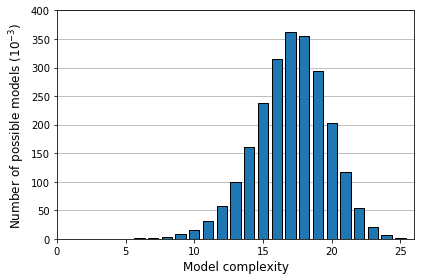

In [5]:
Ylabel = 'Number of possible models ($10^{-3})$'
Xlabel = 'Model complexity'
FontSize = 12

plt.bar(terms, count/1000, edgecolor ='k', zorder = 3, width=0.75)
plt.axis([0, 26, 0 , 400])
plt.ylabel(Ylabel, fontsize=FontSize)
plt.xlabel(Xlabel, fontsize=FontSize)
# plt.tick_params(axis='x', labelsize=FontSize)
# plt.tick_params(axis='y', labelsize=FontSize)
plt.grid(axis = 'y', zorder = 0)
plt.tight_layout()
# plt.show()
plt.savefig('bar.png')


In [9]:
i = list(model_df['Kfold']).index(max(model_df['Kfold']))
print(list(model_df['Kfold'])[i], list(model_df['Cond_No'])[i] )

0.46784762941762 326.2373508055627


In [6]:
count = np.zeros(28)

for i, j in enumerate(model_df['Kfold']):
    k = model_df['No_terms'][i] - 1
    if count[k] < j:
        count[k] = j
    
terms = np.linspace(1,28, 28)

In [7]:
count2 = [100]*28

for i, j in enumerate(model_df['AIC']):
    k = model_df['No_terms'][i] - 1
    if count2[k] > j:
        count2[k] = j

In [8]:
count2

[47.42778347378051,
 42.86732686549709,
 19.9288247254094,
 17.453302217943843,
 17.262155503073274,
 14.511872327928033,
 13.586332479157178,
 14.84886435486753,
 13.58077896189188,
 14.465871154863509,
 15.485858220208184,
 16.39663407314326,
 16.871151402159587,
 17.99163565729971,
 18.902394498083037,
 19.299660797472924,
 20.529409018285502,
 21.71622770375133,
 22.42445091144761,
 23.94080940236089,
 25.59189889705506,
 27.268026409402733,
 28.7356436214247,
 30.326904761636754,
 31.953936886149663,
 33.7418158621128,
 35.628022471361064,
 37.59934031662333]

In [9]:
min2 = 0
max2 = max(count2)

for i in range(len(count2)):
    count2[i] = 1- (count2[i]- min2)/(max2-min2)
count2

[0.0,
 0.09615580308121663,
 0.5798069556333653,
 0.6320025744489504,
 0.6360328432253995,
 0.6940217048947559,
 0.7135364235044189,
 0.6869163332695818,
 0.7136535176812608,
 0.6949916252598928,
 0.6734855165903078,
 0.6542820922211596,
 0.6442770425591055,
 0.6206519820339902,
 0.6014489163607478,
 0.5930726805282319,
 0.5671438234166104,
 0.5421201221483035,
 0.5271874570346616,
 0.49521551190356417,
 0.4604028056423294,
 0.42506218059974676,
 0.39411793010924456,
 0.36056668601427744,
 0.3262612218887532,
 0.28856435214253096,
 0.24879427496211592,
 0.20722965395569515]

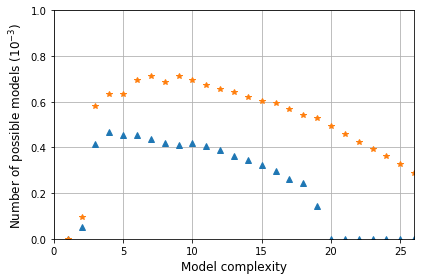

In [11]:
Ylabel = 'Number of possible models ($10^{-3})$'
Xlabel = 'Model complexity'
FontSize = 12

plt.plot(terms, count, "^")
plt.plot(terms, count2, "*")
plt.axis([0, 26, 0 , 1])
plt.ylabel(Ylabel, fontsize=FontSize)
plt.xlabel(Xlabel, fontsize=FontSize)
# plt.tick_params(axis='x', labelsize=FontSize)
# plt.tick_params(axis='y', labelsize=FontSize)
plt.grid(zorder = 0)
plt.tight_layout()
plt.show()
# plt.savefig('bar.png')


In [ ]:
# plt.plot(model_df['No_terms'], model_df['r2'], 'r*')
# plt.plot(model_df['No_terms'], 1- (model_df['AIC']/80), 'b*')
# plt.plot(model_df['No_terms'], model_df['Kfold'], 'g*')
# plt.axis([0, 25, -0.5, 1.2])
# # plt.xlabel('CN')
# # plt.ylabel('AIC')
# plt.show()

In [ ]:
# max(model_df['Kfold'])

In [ ]:
# plt.plot(model_df['Cond_No'], model_df['Kfold'], 'r*')
# # plt.plot(model_df['No_terms'], 1- (model_df['AIC']/80), 'b*')
# # plt.plot(model_df['No_terms'], model_df['Kfold'], 'g*')
# plt.axis([0, 400, -1, 1])
# # plt.xlabel('CN')
# # plt.ylabel('AIC')
# plt.show()